In [1]:
from math import *
import numpy as np
import numpy.linalg as linalg

def eigensolver(H):
    e, v = linalg.eig(H)
    idx = e.argsort()[::1]   
    e = e[idx]
    v = v[:,idx]
    return e, v

In [2]:
# coupling with field
g =0.01
hw=0.5
dd=0.05
# solution of the Schrodinger equation at t=0
H=np.zeros((5,5))
H[0,0]=hw
H[1,1]=hw
H[2,2]=hw
H[3,3]=hw
H[4,4]=hw
H[0,1]=g
H[0,2]=g
H[1,0]=g
H[1,3]=g
H[2,1]=g
H[2,4]=g
H[3,1]=g
H[4,2]=g
H[1,2]=dd
H[2,1]=dd
E, v = eigensolver(H)

In [3]:
def runge_kutta_4(t,dim,fun,rho_0,gamma):

    npoints = len(t)
    rho_list = np.zeros((npoints, dim, dim), dtype=np.cdouble)
    rho = np.array(rho_0,dtype=np.cdouble)
    rho_list[0,:,:] = rho
    
    for i in range(1,npoints):

        h = t[i] - t[i-1]

        # Runge-Kutta
        k1 = fun(rho,gamma)
        k2 = fun(rho + 0.5*h*k1,gamma)
        k3 = fun(rho + 0.5*h*k2,gamma)
        k4 = fun(rho + h*k3,gamma)
        rho = rho + 1.0/6.0 * h * (k1 + 2*k2 + 2*k3 + k4)

        rho_list[i,:,:] = rho
    
    return rho_list
    
t = np.linspace(0,1000,1001)

def fun_no_leaks(rho,gamma):
    return (-1j)*(np.matmul(H, rho) - np.matmul(rho,H))

rho_list = runge_kutta_4(t, 5, fun_no_leaks, [[0,0,0,0,0],[0,0,0,0,0],[0,0,1,0,0],[0,0,0,0,0],[0,0,0,0,0]], 0.0)

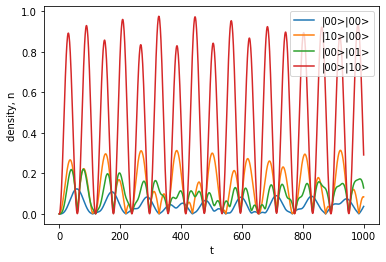

In [4]:
import matplotlib.pyplot as plt

plt.plot(t, abs(rho_list[:,0,0]), label='|00>|00>')
plt.plot(t, abs(rho_list[:,0,1]), label='|10>|00>')
plt.plot(t, abs(rho_list[:,1,0]), label='|00>|01>')
plt.plot(t, abs(rho_list[:,1,1]), label='|00>|10>')
plt.legend(loc='upper right')
plt.xlabel('t')
plt.ylabel('density, n')
plt.show()